In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("./Cleaned-CC-Data/clean_dataset.csv")
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


Gender:


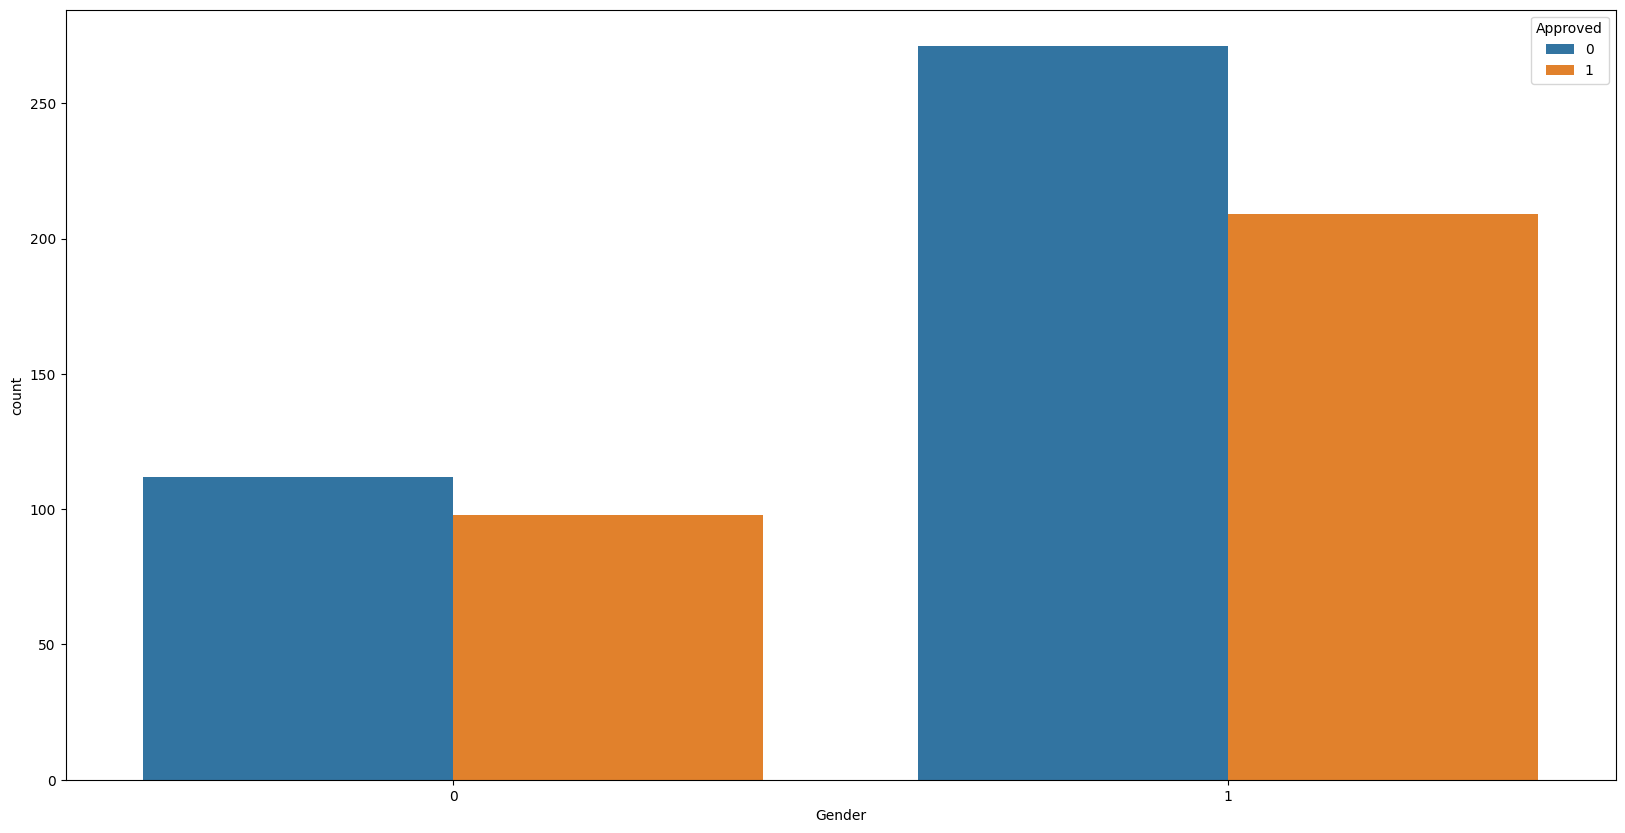

'Gender' is a 'bad Predictor'
p_val = 0.44723087514133186

Married:


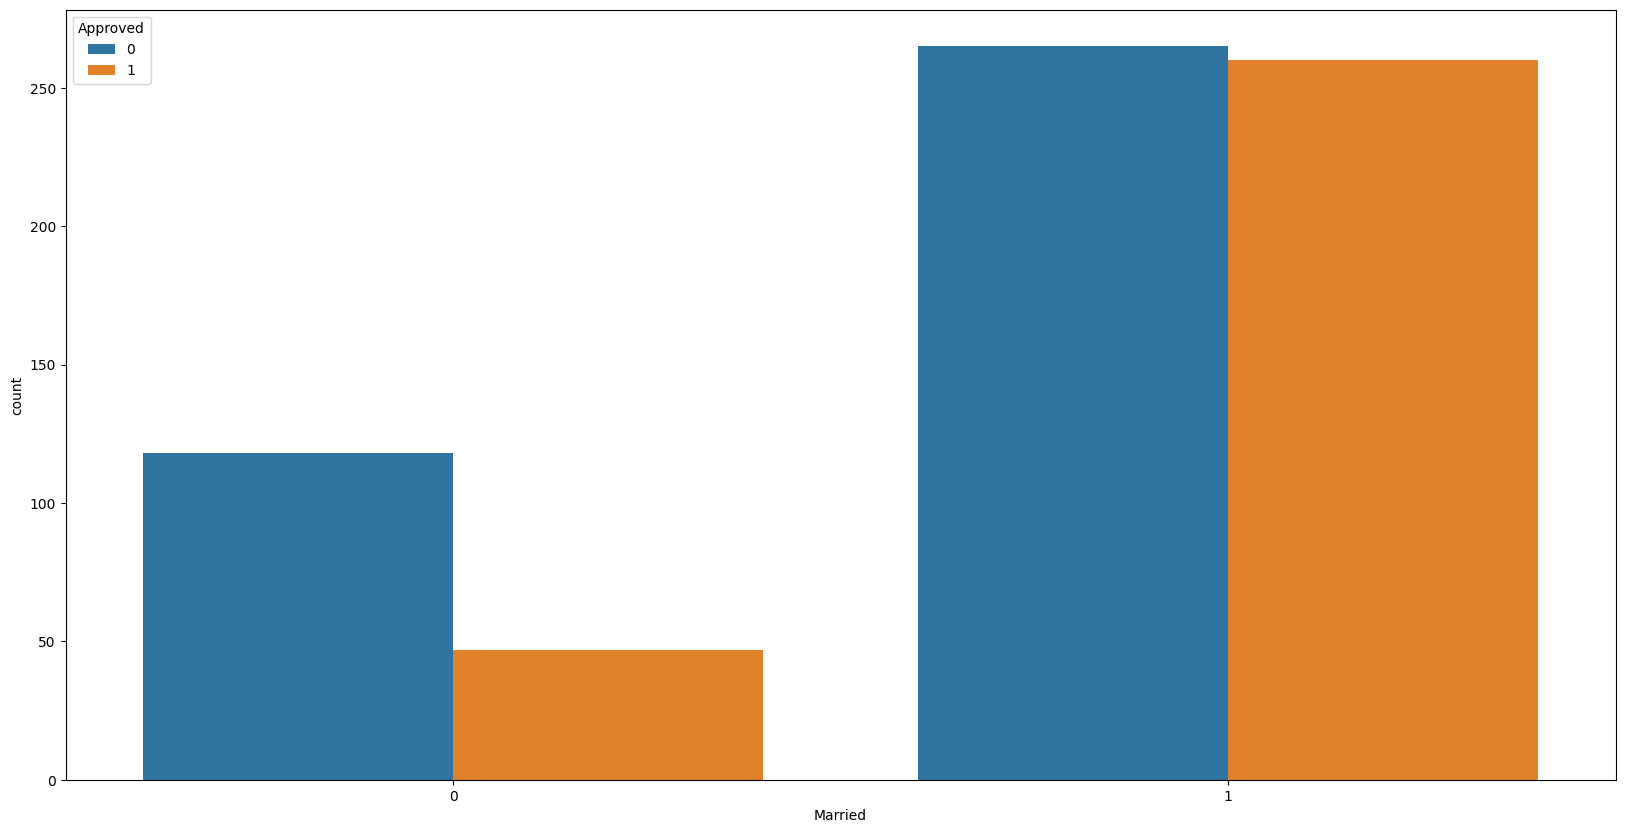

'Married' is a 'Good Predictor'
p_val = 2.100231920165588e-06

BankCustomer:


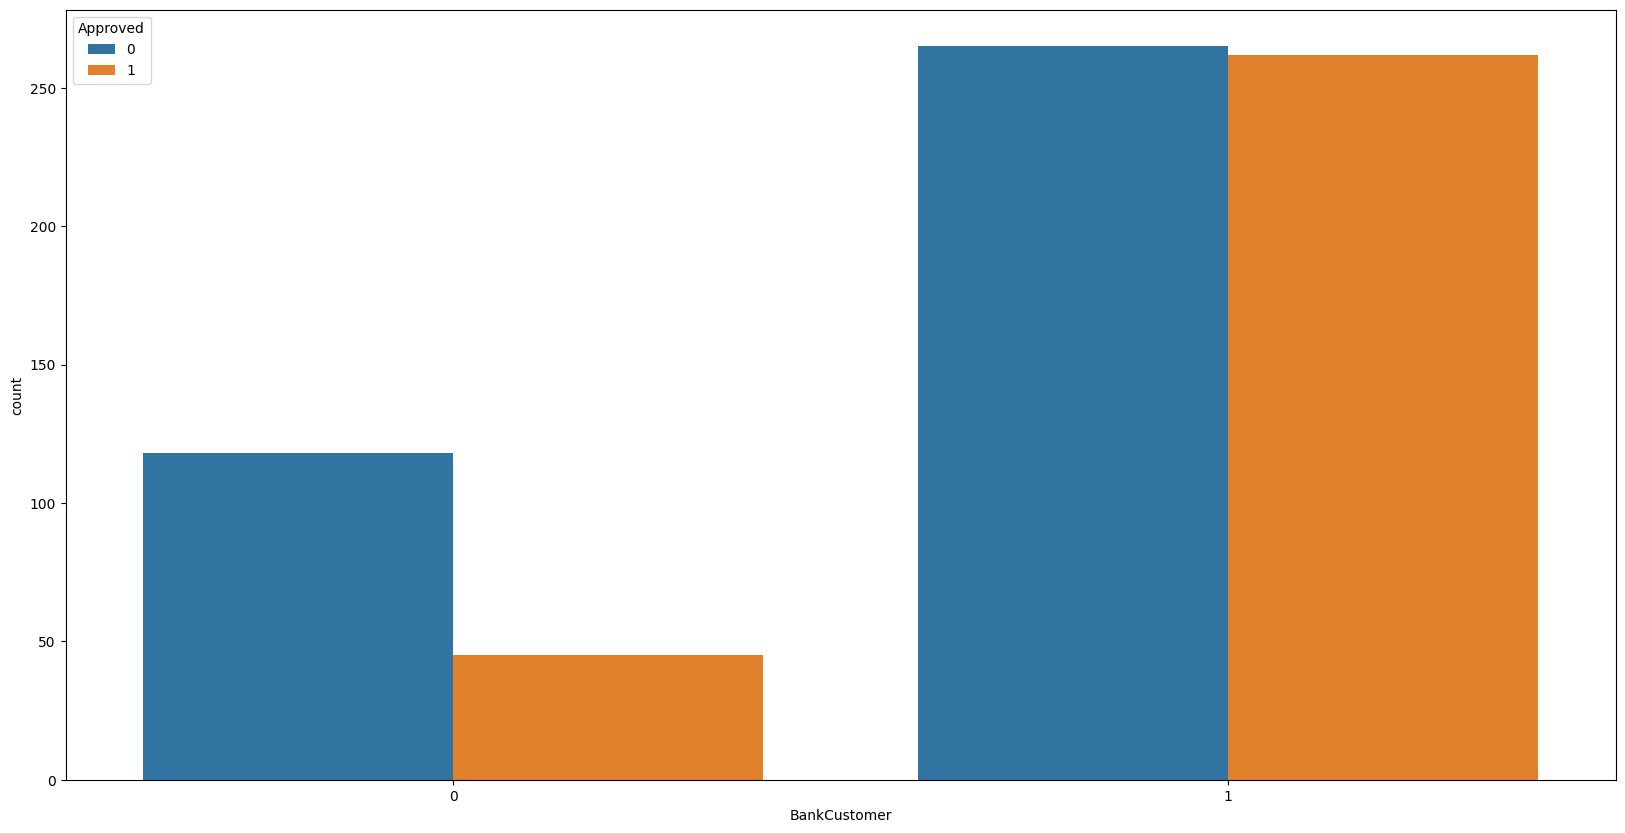

'BankCustomer' is a 'Good Predictor'
p_val = 6.91661320541803e-07

Industry:


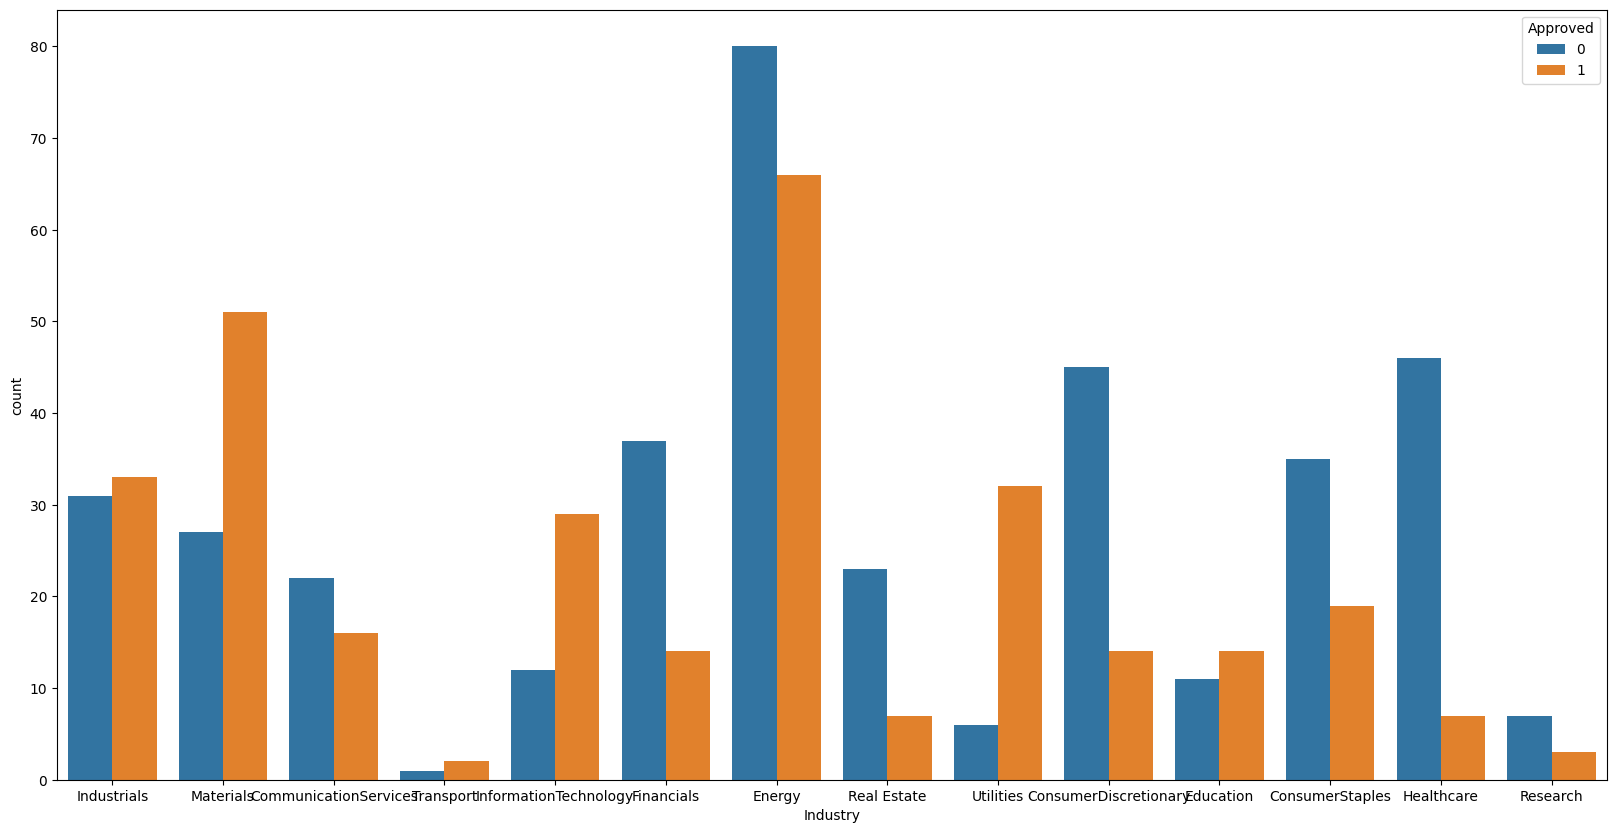

'Industry' is a 'Good Predictor'
p_val = 3.502987066102042e-15

Ethnicity:


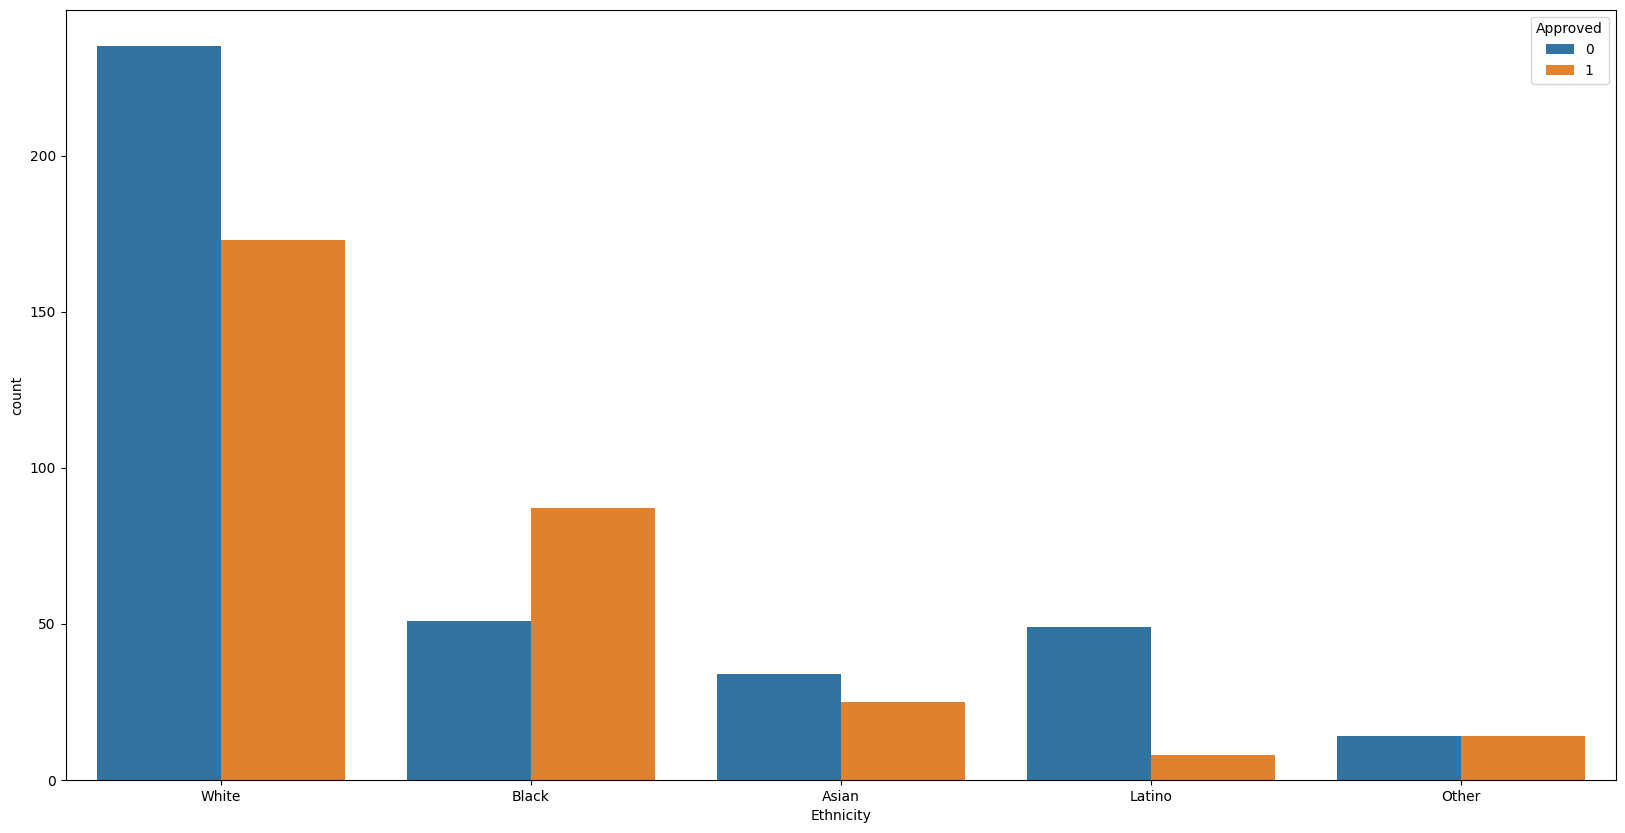

'Ethnicity' is a 'Good Predictor'
p_val = 1.8236656549346847e-08

PriorDefault:


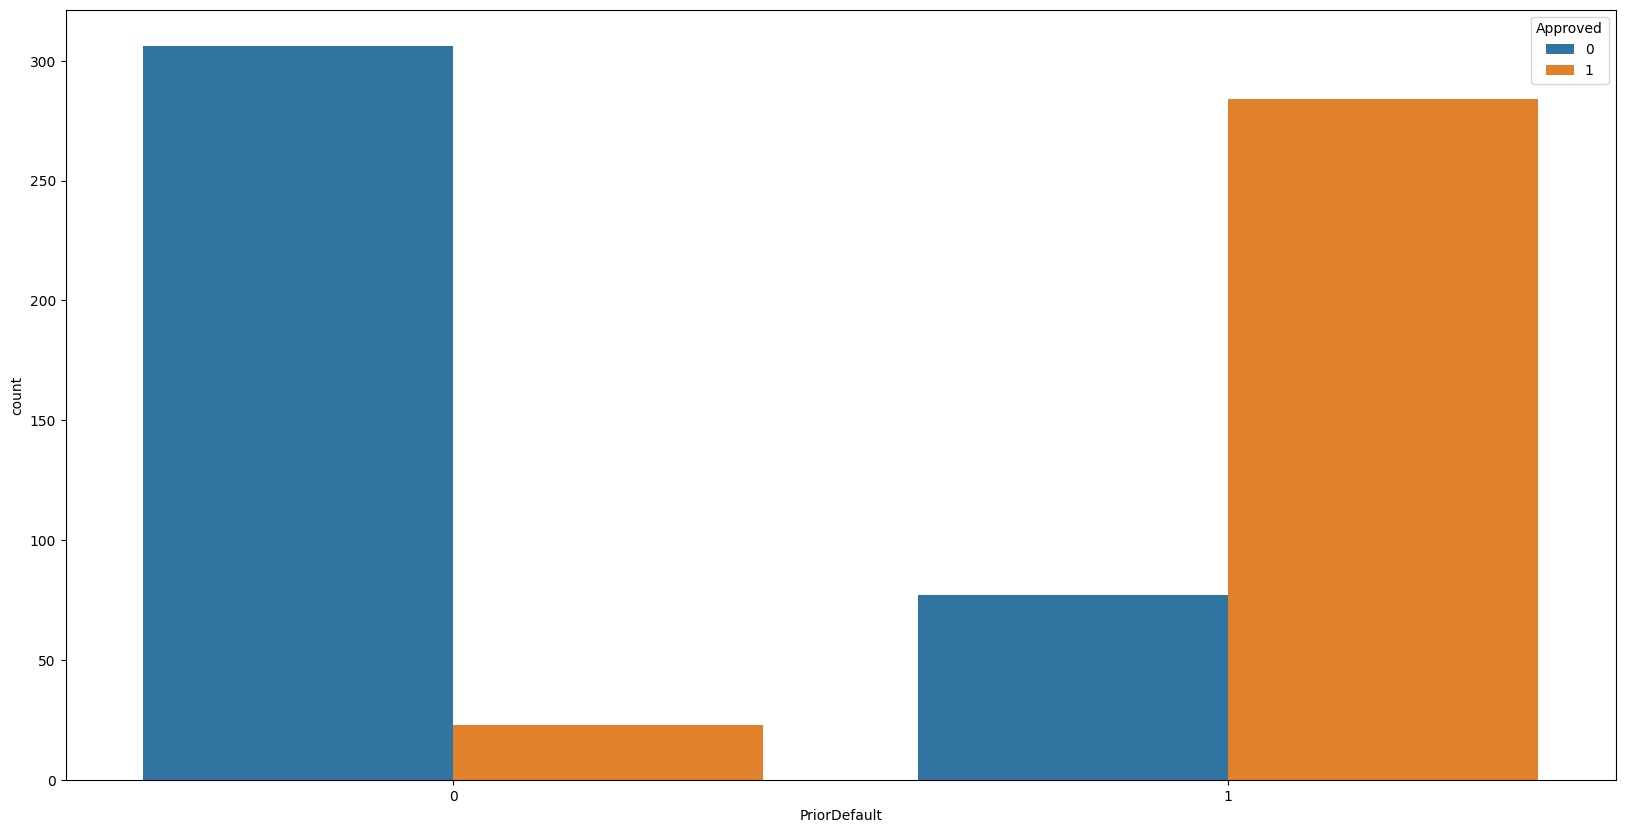

'PriorDefault' is a 'Good Predictor'
p_val = 7.298530125411298e-80

Employed:


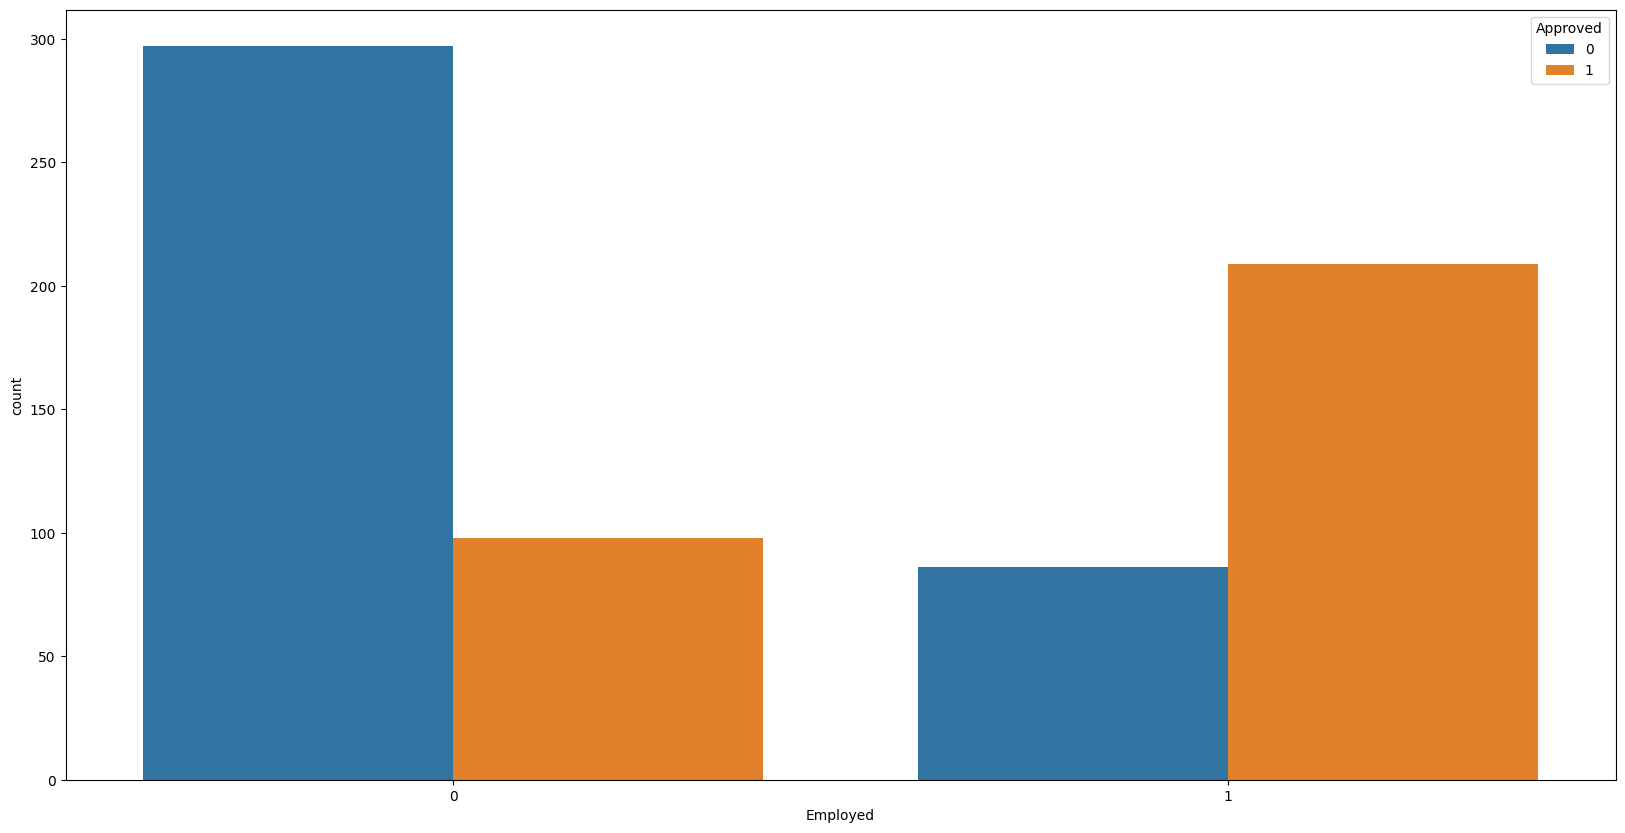

'Employed' is a 'Good Predictor'
p_val = 2.2272693453122814e-33

DriversLicense:


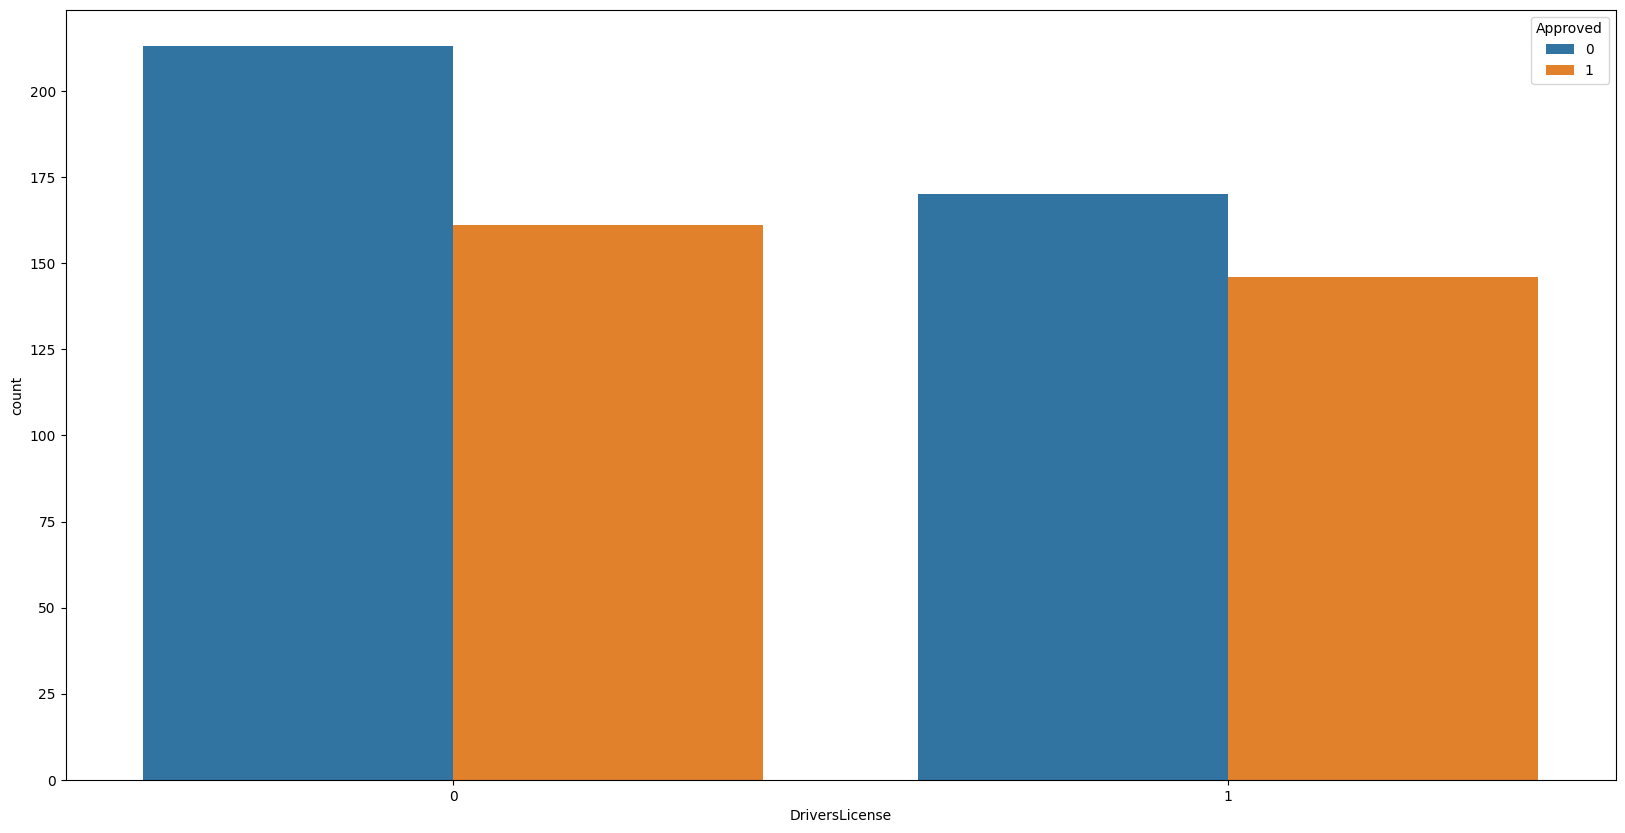

'DriversLicense' is a 'bad Predictor'
p_val = 0.4061341323141693

Citizen:


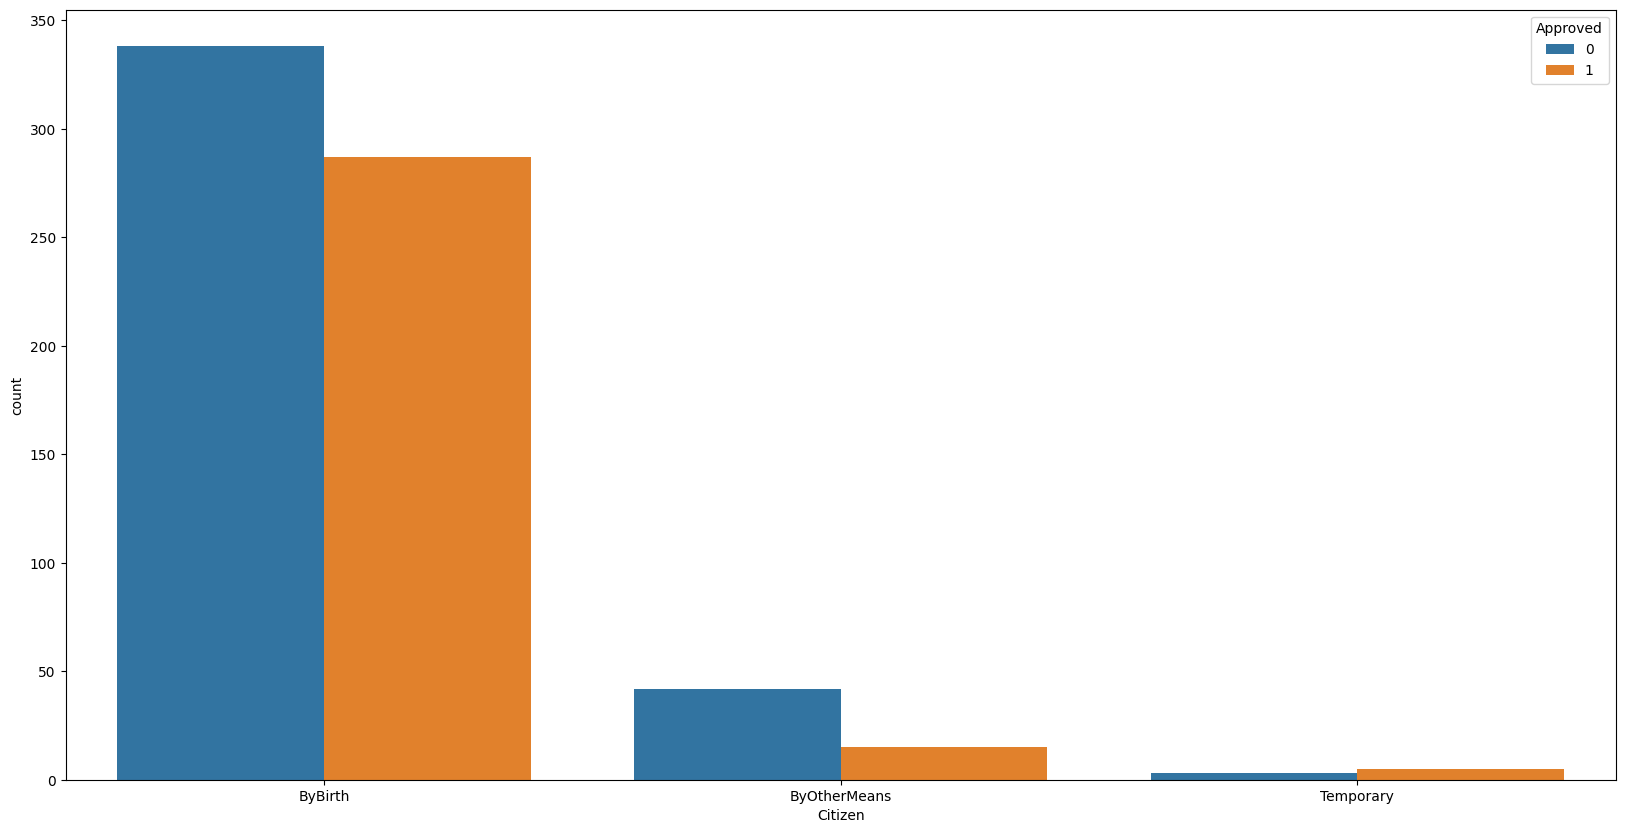

'Citizen' is a 'Good Predictor'
p_val = 0.01009429137045636

ZipCode:


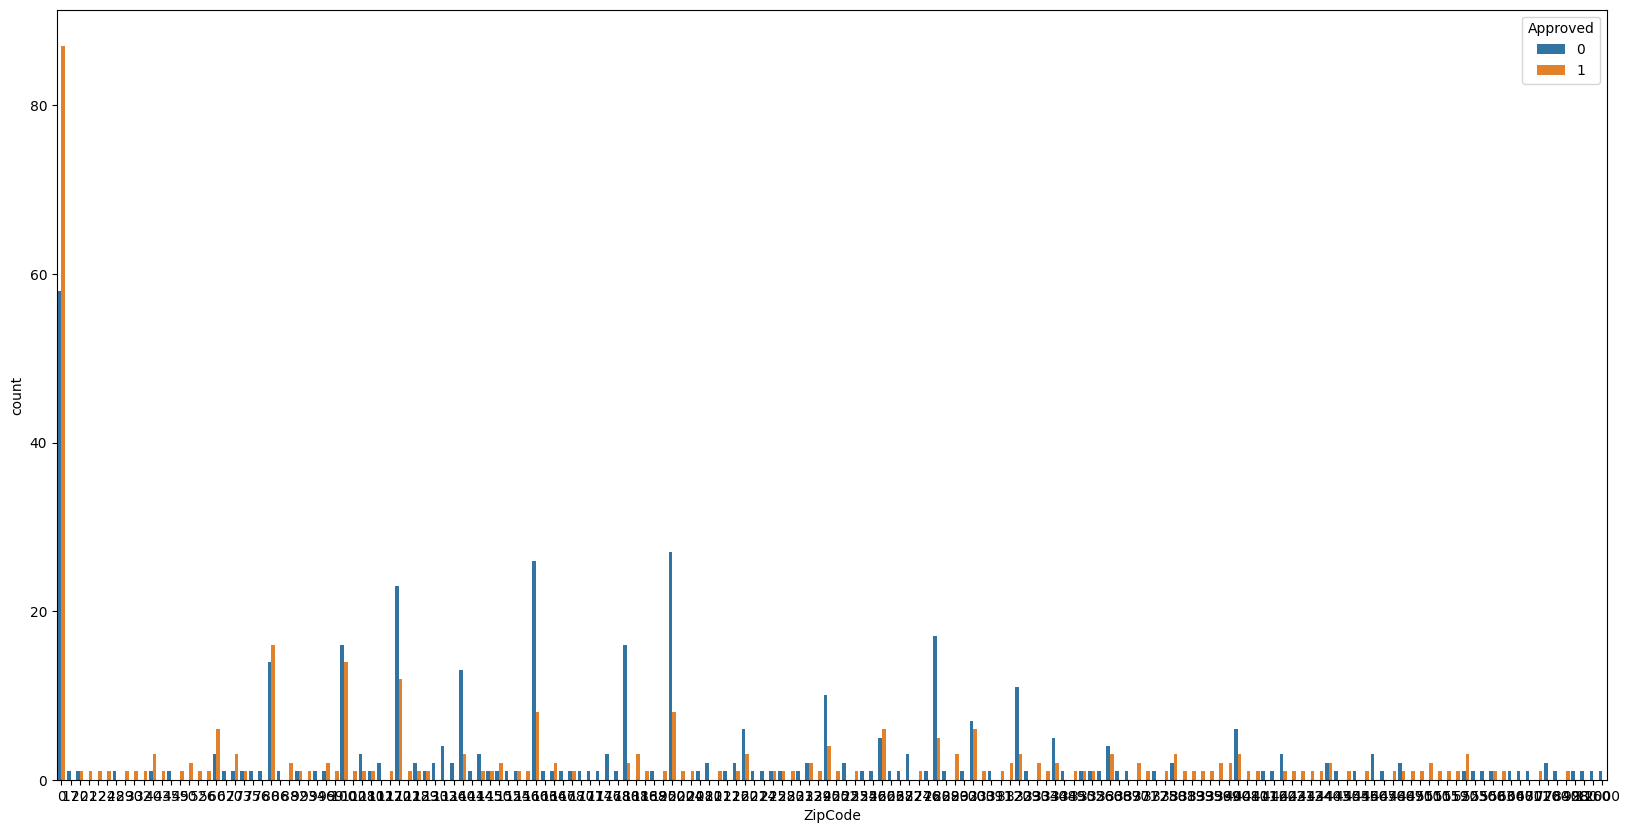

'ZipCode' is a 'Good Predictor'
p_val = 0.006354824252183887

Approved:


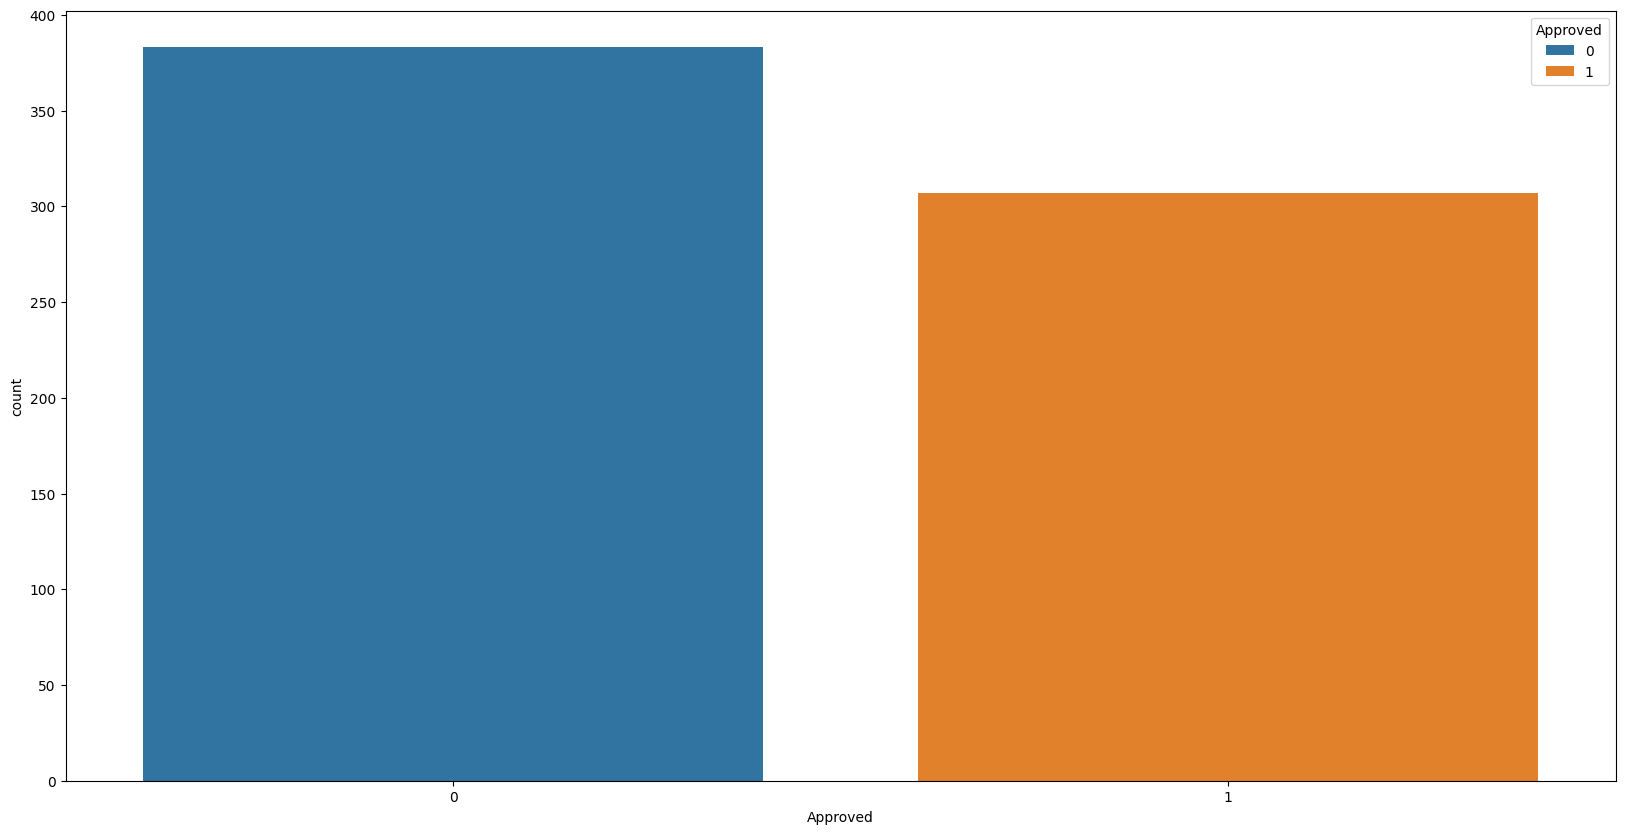

'Approved' is a 'Good Predictor'
p_val = 4.469841378183071e-152



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import colorama
from colorama import Fore
category=['Gender','Married','BankCustomer','Industry','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen','ZipCode','Approved']

for i in category:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.countplot(x=i,data=df,hue='Approved')
    plt.show()
    a=np.array(pd.crosstab(df.Approved,df[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'".format(i))
        print("p_val = {}\n".format(p))
    else:
        print(Fore.GREEN +"'{}' is a 'Good Predictor'".format(i))
        print("p_val = {}\n".format(p))

In [5]:
#drop bad predictor
df.drop(['Gender', 'DriversLicense'], axis=1, inplace=True)


In [6]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Remove the target variable from the list of features if present
if 'Approved' in categorical_cols:
    categorical_cols.remove('Approved')
if 'Approved' in numerical_cols:
    numerical_cols.remove('Approved')


In [7]:
print("Data types of the columns:")
print(df.dtypes)

print("\nCategorical columns identified:")
print(categorical_cols)


Data types of the columns:
Age              float64
Debt             float64
Married            int64
BankCustomer       int64
Industry          object
Ethnicity         object
YearsEmployed    float64
PriorDefault       int64
Employed           int64
CreditScore        int64
Citizen           object
ZipCode            int64
Income             int64
Approved           int64
dtype: object

Categorical columns identified:
['Industry', 'Ethnicity', 'Citizen']


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoders for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future use (e.g., inverse_transform)

print("Unique values in categorical columns after encoding:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
print("\nData types of the columns after encoding:")
print(df.dtypes)

Unique values in categorical columns after encoding:
Industry: [ 7  9  0 12  8  5  4 10 13  1  3  2  6 11]
Ethnicity: [4 1 0 2 3]
Citizen: [0 1 2]

Data types of the columns after encoding:
Age              float64
Debt             float64
Married            int64
BankCustomer       int64
Industry           int64
Ethnicity          int64
YearsEmployed    float64
PriorDefault       int64
Employed           int64
CreditScore        int64
Citizen            int64
ZipCode            int64
Income             int64
Approved           int64
dtype: object


In [9]:
# For preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For splitting the data
from sklearn.model_selection import train_test_split

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separate features and target variable
X = df.drop('Approved', axis=1)
y = df['Approved']

# Split the data into training, testing, and validation sets
# First split: train + validate and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: train and validate
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Print the shapes of the resulting splits
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (414, 13) (414,)
Validation set: (138, 13) (138,)
Test set: (138, 13) (138,)


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

# Step 1: Instantiate the DecisionTreeRegressor model
# You can adjust hyperparameters as needed
regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01)

# Step 2: Train the model using the training data
regressor.fit(X_train, y_train)

# Step 3: Make predictions on the test and validation data
y_test_pred = regressor.predict(X_test)
y_val_pred = regressor.predict(X_val)

# Step 4: Round predictions to get binary classification
y_test_pred_binary = np.round(y_test_pred).astype(int)
y_val_pred_binary = np.round(y_val_pred).astype(int)

# Step 5: Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

print(f'Test Set Evaluation:')
print(f'Mean Absolute Error: {test_mae}')
print(f'R-squared Score: {test_r2}')
print(f'Accuracy: {test_accuracy * 100:.2f}%')

# Step 6: Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_accuracy = accuracy_score(y_val, y_val_pred_binary)

print(f'\nValidation Set Evaluation:')
print(f'Mean Absolute Error: {val_mae}')
print(f'R-squared Score: {val_r2}')
print(f'Accuracy: {val_accuracy * 100:.2f}%')

Test Set Evaluation:
Mean Absolute Error: 0.2246376811594203
R-squared Score: 0.10126050420168065
Accuracy: 77.54%

Validation Set Evaluation:
Mean Absolute Error: 0.2028985507246377
R-squared Score: 0.16309291747888233
Accuracy: 79.71%
